In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   #그래프 출력시
import matplotlib as mpl    #그래프 옵션
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

#그래프 시각화 옵션 설정함수
%matplotlib inline

#그래프의 한글설정
mpl.rc('font',family='Malgun Gothic')

#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수 값이 나올 때, 깨지는 현상 방지
mpl.rc('axes',unicode_minus=False)

C:\Users\82105\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)

Bad key "text.kerning_factor" on line 4 in
C:\Users\82105\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\82105\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
weather=pd.read_csv('weatherAUS.csv')
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


# PreProcessing

## 결측치 처리

In [ ]:
weather.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

**Rainfall,Evaporation,Sunshine,Cloud9am,Cloud3pm는 drop**

**RISK_MM도 변수 특성상 drop해주어야함**

In [ ]:
weather.drop(columns=['Evaporation','Sunshine','Pressure9am',
                      'RISK_MM','Pressure3pm', 'Cloud9am', 'Cloud3pm'],axis=1,inplace=True)

In [ ]:
weather=weather.dropna()

In [ ]:
weather.reset_index(drop=True,inplace=True)
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121785,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,9.4,20.9,No,No
121786,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No
121787,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No
121788,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No


## 파생변수 생성

In [ ]:
def season(data):
    data=str(data)
    data=data.split('-')[1]
    return data

weather['month']=weather['Date'].apply(season)

#호주의 계절 분기에 따라 봄-1, 여름-2, 가을-3, 겨울-4로 매핑

In [ ]:
weather['season']=weather['month'].replace(['12','01','02'],2).replace(['03','04','05'],3).replace(['06','07','08'],4).replace(['09','10','11'],1)

#호주에는 우기와 건기가 존재함 우기-1, 건기-0으로 매핑

In [ ]:
weather['rain_season']=weather['month'].replace(['11','12','01','02','03','04'],1).replace(['05','06','07','08','09','10'],0)

# EDA

[Text(0.5, 0, 'MinTemp'),
 Text(1.5, 0, 'MaxTemp'),
 Text(2.5, 0, 'Rainfall'),
 Text(3.5, 0, 'WindGustSpeed'),
 Text(4.5, 0, 'WindSpeed9am'),
 Text(5.5, 0, 'WindSpeed3pm'),
 Text(6.5, 0, 'Humidity9am'),
 Text(7.5, 0, 'Humidity3pm'),
 Text(8.5, 0, 'Temp9am'),
 Text(9.5, 0, 'Temp3pm'),
 Text(10.5, 0, 'season'),
 Text(11.5, 0, 'rain_season')]

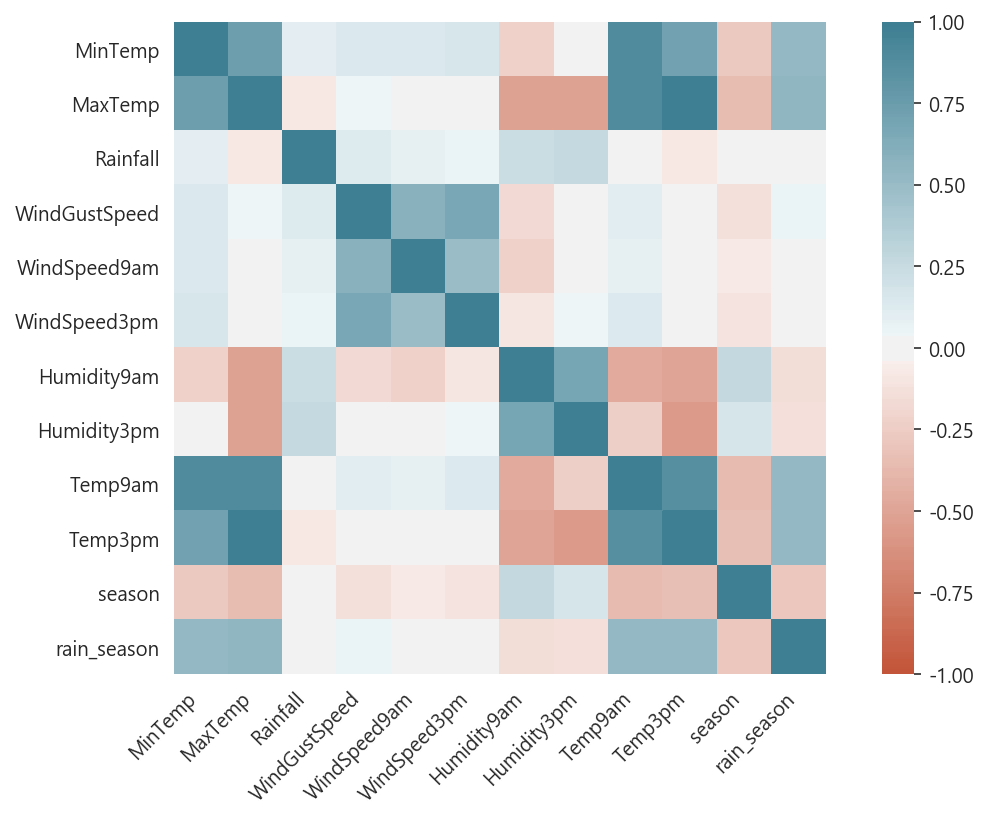

In [ ]:
corr = weather.corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

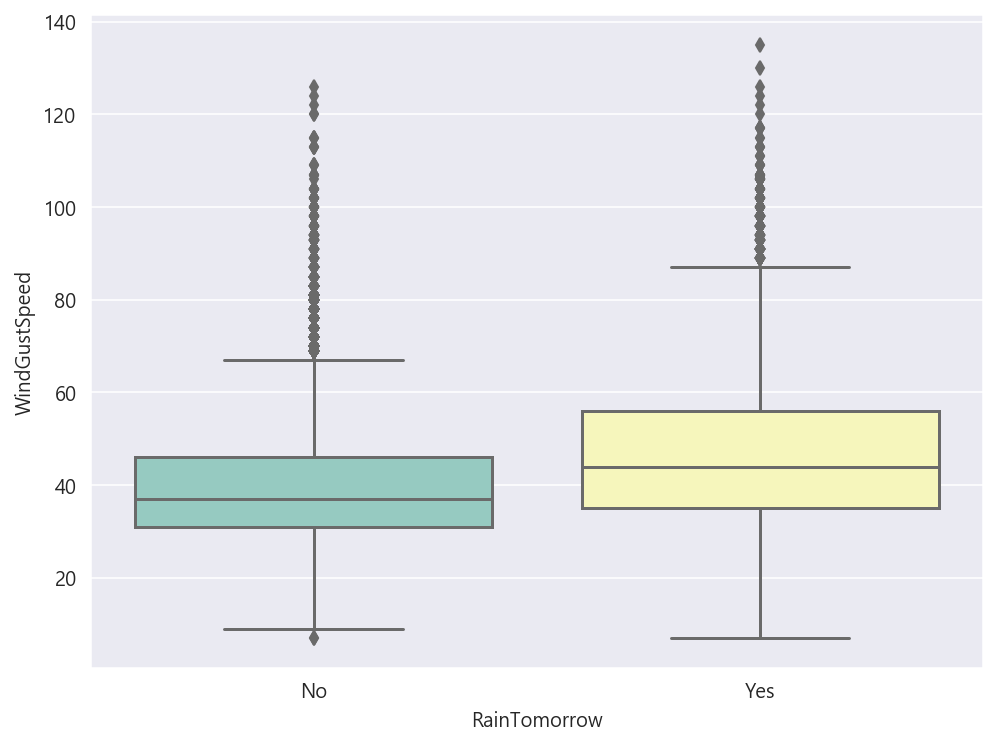

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='RainTomorrow', y='WindGustSpeed', data=weather, palette='Set3')
plt.show()

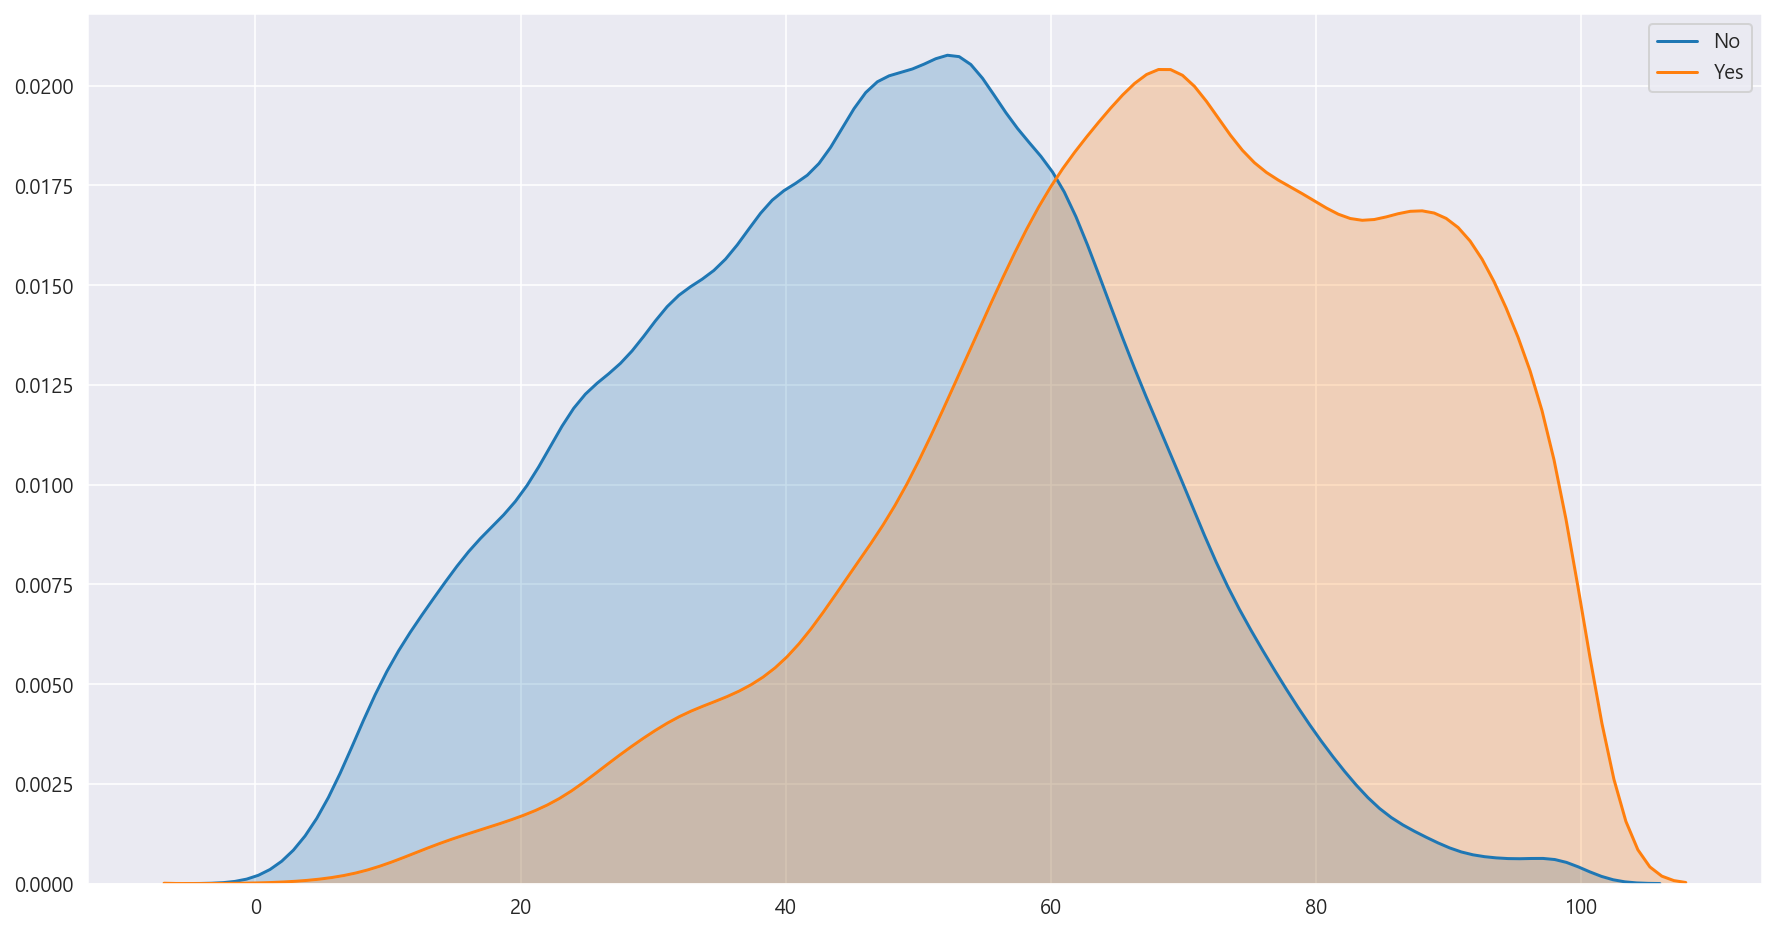

In [ ]:
plt.figure(figsize=(15,8))
a=weather['RainTomorrow'].unique()
for i, name in enumerate(a):
    sns.kdeplot(weather[weather['RainTomorrow'] == name]['Humidity3pm'], label=name,legend=True,shade=True)

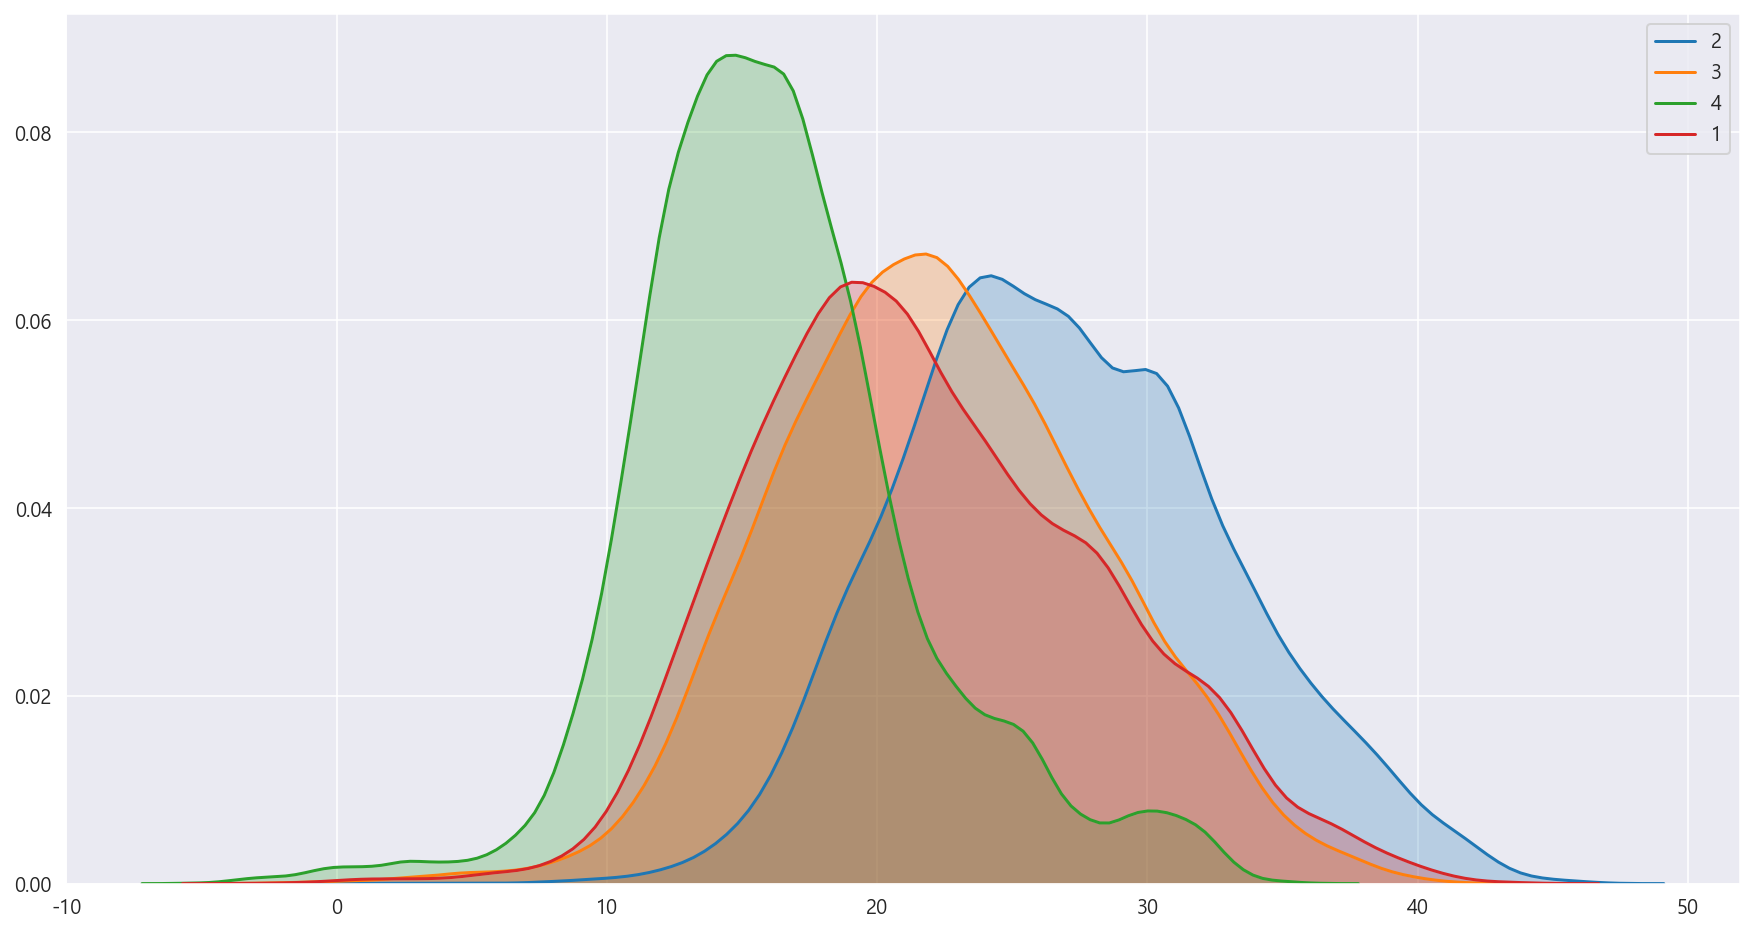

In [ ]:
plt.figure(figsize=(15,8))
a=weather['season'].unique()
for i, name in enumerate(a):
    sns.kdeplot(weather[weather['season'] == name]['Temp3pm'], label=name,legend=True,shade=True)

# Modeling

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_list=['Location','WindGustDir','WindDir9am','WindDir3pm']

In [ ]:
for i in label_list:
    y1=weather[[i]].values.tolist()
    encoder=LabelEncoder()
    encoder.fit(y1)
    label1=encoder.transform(y1)
    weather[i]=label1

In [ ]:
weather['RainToday']=weather['RainToday'].replace('No',0).replace('Yes',1)
weather['RainTomorrow']=weather['RainTomorrow'].replace('No',0).replace('Yes',1)

In [ ]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,season,rain_season
0,2008-12-01,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,16.9,21.8,0,0,12,2,1
1,2008-12-02,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,17.2,24.3,0,0,12,2,1
2,2008-12-03,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,21.0,23.2,0,0,12,2,1
3,2008-12-04,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,18.1,26.5,0,0,12,2,1
4,2008-12-05,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,17.8,29.7,0,0,12,2,1


In [ ]:
weather.shape

(121790, 20)

## Train-Validation-Test Split

In [ ]:
weather=weather[['Date','season','rain_season','Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow']]

In [ ]:
X=weather.iloc[:,1:18]
Y=weather.iloc[:,18]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [ ]:
print('학습셋:',X_train.shape,',',Y_train.shape)
print('테스트셋:',X_test.shape,',',Y_test.shape)

학습셋: (85253, 17) , (85253,)
테스트셋: (36537, 17) , (36537,)


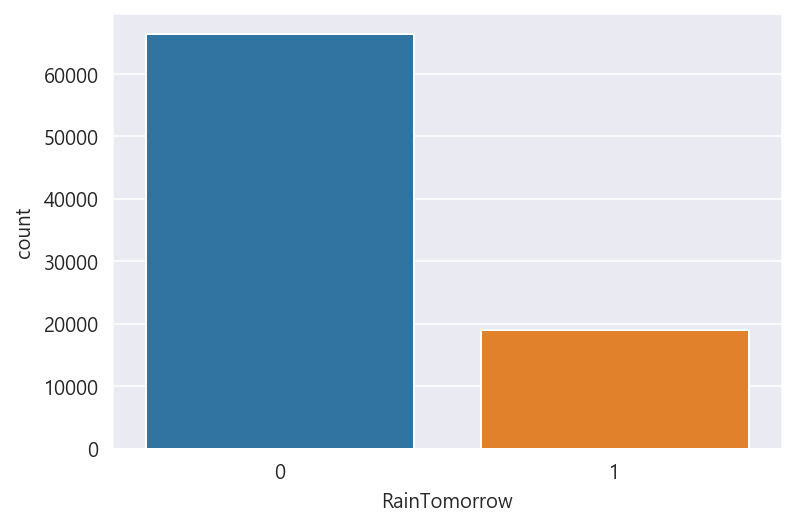

In [ ]:
sns.countplot(Y_train)

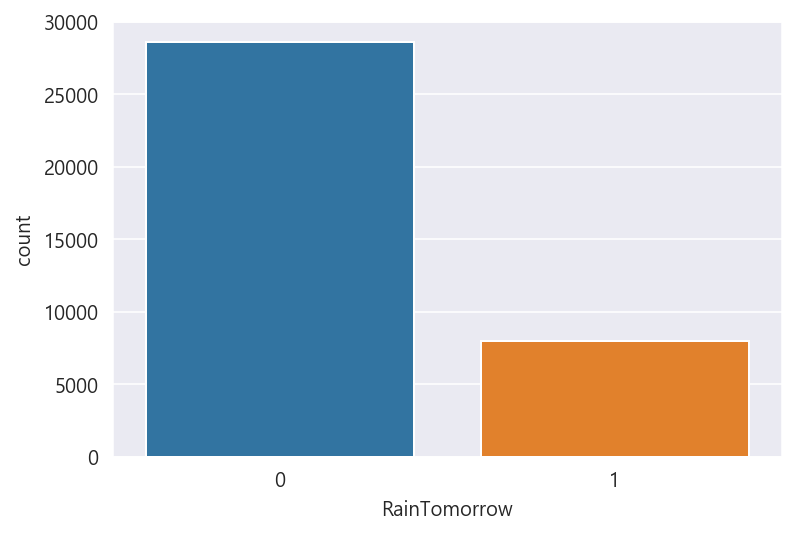

In [ ]:
sns.countplot(Y_test)

## LigthGBM

### Feature Selection

In [ ]:
lgb=LGBMClassifier()
lgb.fit(X_train,Y_train)
pred=lgb.predict(X_test)
f1_score(Y_test,pred)

0.6223365172667158

In [ ]:
kfold=KFold(n_splits=5)
cv_score=[]

x=X.values
y=Y.values
model=LGBMClassifier()

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]
    
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    n_iter=n_iter+1
    
    acc_train=f1_score(y_train,y_pred_train)
    acc_test=f1_score(y_test,y_pred_test)
    cv_score.append(acc_test)
    
    print("Modeling ",n_iter,"st")
    print('train set f1_score: ',acc_train)
    print('test set f1_score: ',acc_test)
    print("-----------------------------------------")
    
print('Mean test set f1_score: ',np.mean(cv_score))

Modeling  1 st
train set f1_score:  0.6505671026211538
test set f1_score:  0.6039047326995809
-----------------------------------------
Modeling  2 st
train set f1_score:  0.6546517291768144
test set f1_score:  0.5982524632831381
-----------------------------------------
Modeling  3 st
train set f1_score:  0.6502771618625277
test set f1_score:  0.6070075757575758
-----------------------------------------
Modeling  4 st
train set f1_score:  0.6377920255358961
test set f1_score:  0.6211881635419021
-----------------------------------------
Modeling  5 st
train set f1_score:  0.6456380870775986
test set f1_score:  0.5982803916885597
-----------------------------------------
Mean test set f1_score:  0.6057266653941513


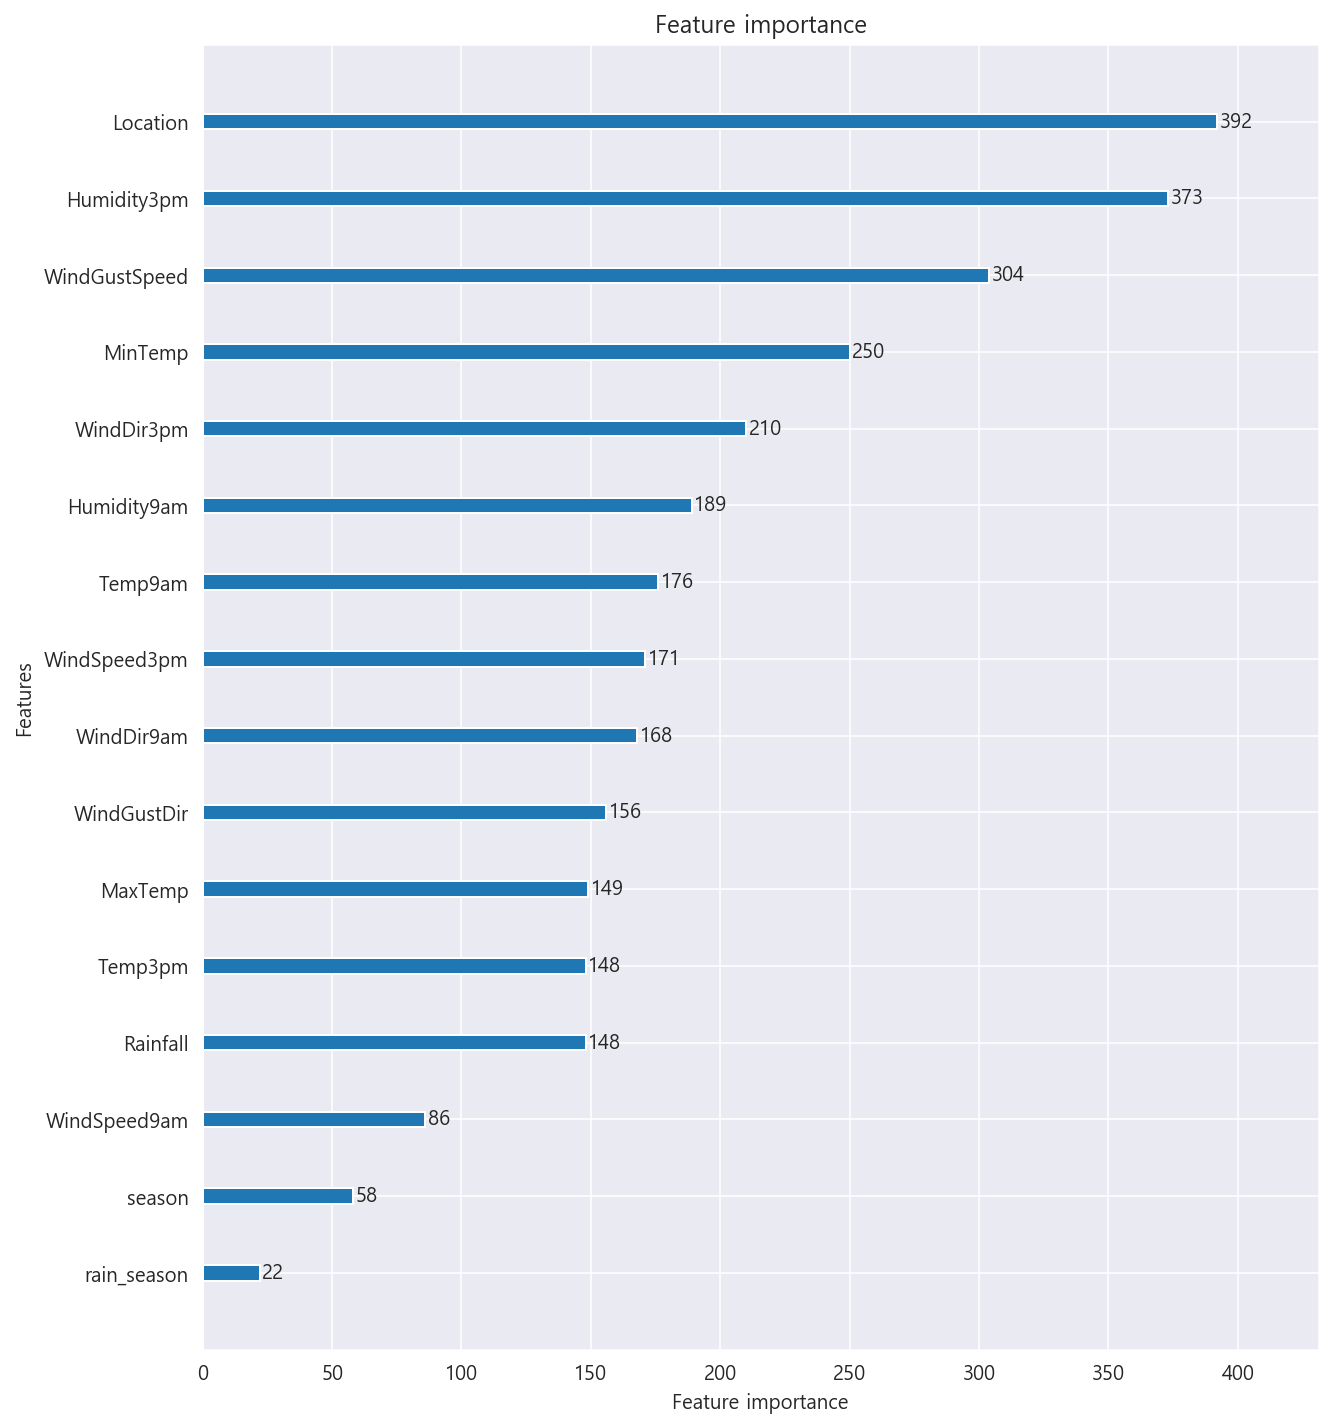

In [ ]:
#변수중요도 plot
from lightgbm import plot_importance
lgb=LGBMClassifier()
lgb.fit(X_train,Y_train)
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgb,ax=ax)

**=> rain_season까지 제거, 정해진 기준은 없으나 rain_season까지 제거했을때 더 좋은 성능임을 확인**

In [ ]:
feature=['Location','Humidity3pm','WindGustSpeed','MinTemp','Humidity9am','Temp3pm','Temp9am','WindDir3pm',
        'WindGustDir','WindSpeed3pm','MaxTemp','Rainfall','WindDir9am','season']

In [ ]:
#선택된 변수들로만 다시 X,Y 구성
X_=weather[feature]
Y_=weather.iloc[:,18]

X_train,X_test,Y_train,Y_test=train_test_split(X_,Y_,test_size=0.3,random_state=123)

In [ ]:
print('학습셋:',X_train.shape,',',Y_train.shape)
print('테스트셋:',X_test.shape,',',Y_test.shape)

학습셋: (85253, 14) , (85253,)
테스트셋: (36537, 14) , (36537,)


In [ ]:
kfold=KFold(n_splits=5)
cv_score=[]

x=X_.values
y=Y_.values
model=LGBMClassifier()

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]
    
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    n_iter=n_iter+1
    
    acc_train=f1_score(y_train,y_pred_train)
    acc_test=f1_score(y_test,y_pred_test)
    cv_score.append(acc_test)
    
    print("Modeling ",n_iter,"st")
    print('train set f1_score: ',acc_train)
    print('test set f1_score: ',acc_test)
    print("-----------------------------------------")
    
print('Mean test set f1_score: ',np.mean(cv_score))

Modeling  1 st
train set f1_score:  0.6499362435226133
test set f1_score:  0.6052848885218828
-----------------------------------------
Modeling  2 st
train set f1_score:  0.6525607638888888
test set f1_score:  0.5991016282987086
-----------------------------------------
Modeling  3 st
train set f1_score:  0.6493304870948962
test set f1_score:  0.6072470588235294
-----------------------------------------
Modeling  4 st
train set f1_score:  0.6376119075081013
test set f1_score:  0.6229138475417231
-----------------------------------------
Modeling  5 st
train set f1_score:  0.6444134378018676
test set f1_score:  0.5997610513739545
-----------------------------------------
Mean test set f1_score:  0.6068616949119596


### Hyperparameter Tuning

In [ ]:
model=LGBMClassifier()
param={'max_depth':[-1,3,5],'num_leaves':[31,9,24],'n_estimators':[300,500,700],'learning_rate':[0.1,0.3],
      'class_weight':[None,'balanced']}

grid_model=GridSearchCV(model,param_grid=param, cv=5,scoring='f1')
grid_model.fit(X_train,Y_train)
result=pd.DataFrame(grid_model.cv_results_)

In [ ]:
grid_model.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': -1,
 'n_estimators': 700,
 'num_leaves': 31}

## XGBOOST

In [ ]:
kfold=KFold(n_splits=5)
cv_score=[]

x=X_.values
y=Y_.values
model=XGBClassifier()

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]
    
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    n_iter=n_iter+1
    
    acc_train=f1_score(y_train,y_pred_train)
    acc_test=f1_score(y_test,y_pred_test)
    cv_score.append(acc_test)
    
    print("Modeling ",n_iter,"st")
    print('train set f1_score: ',acc_train)
    print('test set f1_score: ',acc_test)
    print("-----------------------------------------")
    
print('Mean test set f1_score: ',np.mean(cv_score))

Modeling  1 st
train set f1_score:  0.5990409026798308
test set f1_score:  0.58940325887558
-----------------------------------------
Modeling  2 st
train set f1_score:  0.6052690835397432
test set f1_score:  0.5907123179850453
-----------------------------------------
Modeling  3 st
train set f1_score:  0.6000173065274453
test set f1_score:  0.5826497128794094
-----------------------------------------
Modeling  4 st
train set f1_score:  0.585518209690822
test set f1_score:  0.5642274442956289
-----------------------------------------
Modeling  5 st
train set f1_score:  0.5946579586368583
test set f1_score:  0.5657794676806084
-----------------------------------------
Mean test set f1_score:  0.5785544403432544


### Hyperparameter Tuning

In [ ]:
model=XGBClassifier()
param={'max_depth':[3,5,8],'scale_pos_weight':[1,3,5],'n_estimators':[200,300],'min_child_weight':[1,2,3]}

grid_model=GridSearchCV(model,param_grid=param, cv=5,scoring='f1')
grid_model.fit(X_train,Y_train)
result1=pd.DataFrame(grid_model.cv_results_)

In [ ]:
grid_model.best_params_

{'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 300,
 'scale_pos_weight': 3}

## RandomForest

In [ ]:
kfold=KFold(n_splits=5)
cv_score=[]

x=X_.values
y=Y_.values
model=RandomForestClassifier()

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]
    
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    n_iter=n_iter+1
    
    acc_train=f1_score(y_train,y_pred_train)
    acc_test=f1_score(y_test,y_pred_test)
    cv_score.append(acc_test)
    
    print("Modeling ",n_iter,"st")
    print('train set f1_score: ',acc_train)
    print('test set f1_score: ',acc_test)
    print("-----------------------------------------")
    
print('Mean test set f1_score: ',np.mean(cv_score))

Modeling  1 st
train set f1_score:  0.9999068207230712
test set f1_score:  0.5976465507934795
-----------------------------------------
Modeling  2 st
train set f1_score:  0.9999533603843104
test set f1_score:  0.59106529209622
-----------------------------------------
Modeling  3 st
train set f1_score:  0.9999763151038582
test set f1_score:  0.5886617661866881
-----------------------------------------
Modeling  4 st
train set f1_score:  0.9999768673806935
test set f1_score:  0.5986773407587886
-----------------------------------------
Modeling  5 st
train set f1_score:  0.9999543399844756
test set f1_score:  0.574928133983252
-----------------------------------------
Mean test set f1_score:  0.5901958167636856


### Hyperparameter Tuning

In [ ]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model=RandomForestClassifier()
param={'max_depth':[None,5,8],'class_weight':[None,'balanced'],'n_estimators':[100,200,300],'min_samples_split':[2,3,4]}

grid_model=GridSearchCV(model,param_grid=param, cv=5,scoring='f1')
grid_model.fit(X_train,Y_train)
result2=pd.DataFrame(grid_model.cv_results_)

In [ ]:
grid_model.best_params_

{'class_weight': 'balanced',
 'max_depth': 8,
 'min_samples_split': 2,
 'n_estimators': 100}

# Final Stacking

In [ ]:
lgb=LGBMClassifier(class_weight='balanced',n_estimators=700)
xgb=XGBClassifier(scale_pos_weight=3,max_depth=8,min_child_weight=3,n_estimators=300)
rf=RandomForestClassifier(class_weight='balanced',max_depth=8,min_samples_split=2)

In [ ]:
xgb_final=XGBClassifier(scale_pos_weight=3,max_depth=8,min_child_weight=3,n_estimators=300)

In [ ]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model start ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)): 
        print('\t fold set: ',folder_counter,' start ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
    
        model.fit(X_tr , y_tr)      
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1) 
        test_pred[:, folder_counter] = model.predict(X_test_n)
             
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    return train_fold_pred , test_pred_mean

In [ ]:
lgb_train, lgb_test = get_stacking_base_datasets(lgb, X_train.values, Y_train.values, X_test.values, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb, X_train.values, Y_train.values, X_test.values, 5)
rf_train, rf_test = get_stacking_base_datasets(rf, X_train.values, Y_train.values, X_test.values,  5)    

LGBMClassifier  model start 
	 fold set:  0  start 
	 fold set:  1  start 
	 fold set:  2  start 
	 fold set:  3  start 
	 fold set:  4  start 
XGBClassifier  model start 
	 fold set:  0  start 
	 fold set:  1  start 
	 fold set:  2  start 
	 fold set:  3  start 
	 fold set:  4  start 
RandomForestClassifier  model start 
	 fold set:  0  start 
	 fold set:  1  start 
	 fold set:  2  start 
	 fold set:  3  start 
	 fold set:  4  start 


In [ ]:
Stack_final_X_train = np.concatenate((lgb_train, xgb_train, rf_train), axis=1)
Stack_final_X_test = np.concatenate((lgb_test, xgb_test, rf_test), axis=1)
print('Original train feature Shape:',X_train.shape, 'Original test feature Shape:',X_test.shape)
print('Stacking train feature Shape:', Stack_final_X_train.shape,
      'Stacking test feature 데이터 Shape:',Stack_final_X_test.shape)

Original train feature Shape: (85253, 14) Original test feature Shape: (36537, 14)
Stacking train feature Shape: (85253, 3) Stacking test feature 데이터 Shape: (36537, 3)


In [ ]:
xgb_final.fit(Stack_final_X_train, Y_train)
stack_final = xgb_final.predict(Stack_final_X_test)

print('Final-Meta model F1-score: {0:.4f}'.format(f1_score(Y_test, stack_final)))
print('Final-Meta model Accuracy score: {0:.4f}'.format(accuracy_score(Y_test, stack_final)))

Final-Meta model F1-score: 0.6536
Final-Meta model Accuracy score: 0.8264


# Other Method

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred=dt.predict(X_test)
f1_score(Y_test,pred)

0.5171259962280221

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)
f1_score(Y_test,pred)

0.5345409886398527

In [ ]:
svm=SVC()
svm.fit(X_train,Y_train)
pred=svm.predict(X_test)
f1_score(Y_test,pred)

0.537026287420184